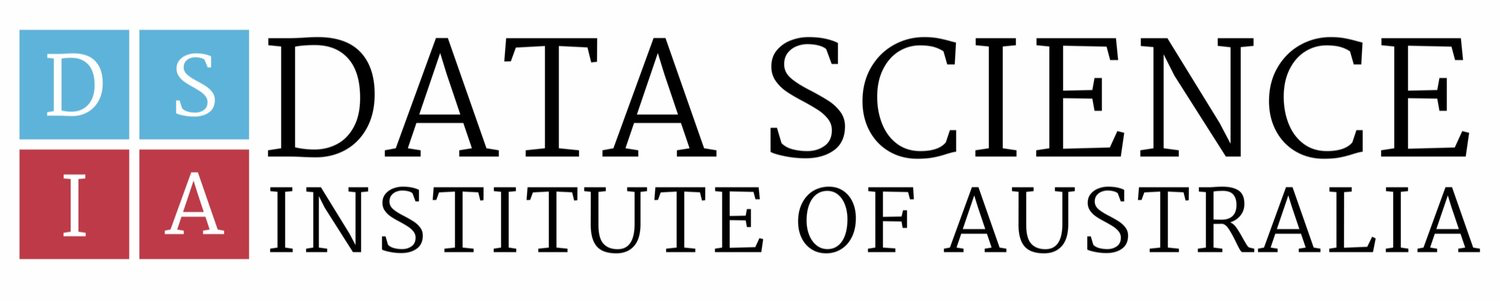

# Data Science and AI
## Lab 5.2: The Perceptron
The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
%matplotlib inline

# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [2]:
X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
X

array([[-2,  4],
       [ 4,  1],
       [ 1,  6],
       [ 2,  4],
       [ 6,  2]])

In [3]:
y = np.array([-1, -1, 1, 1, 1])
y

array([-1, -1,  1,  1,  1])

Here is the training data, along with a candidate hyperplane that separates the classes:

In [4]:
def plotData(X, y):
    # mark the negative samples
    plt.scatter(X[y == -1, 0],
                X[y == -1, 1], s=120,
                marker='_', color='blue', linewidths=2)
    # mark the positive samples
    plt.scatter(X[y == 1, 0],
                X[y == 1, 1], s=120,
                marker='+', color='blue', linewidths=2)

    plt.xlabel('X0')
    plt.ylabel('X1')

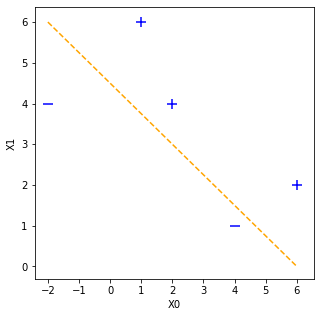

In [5]:
plt.figure(figsize=(5, 5))
plotData(X, y)

# Print a possible hyperplane, that is seperating the two classes:
plt.plot([-2, 6], [6, 0], color='orange', linestyle='dashed')
plt.show()

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector (represented by ⟨x[i], w⟩ in code commments, below) will determine class membership: 

In [6]:
X = np.array([[-2, 4, -1],
              [4, 1, -1],
              [1, 6, -1],
              [2, 4, -1],
              [6, 2, -1]])
X

array([[-2,  4, -1],
       [ 4,  1, -1],
       [ 1,  6, -1],
       [ 2,  4, -1],
       [ 6,  2, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [7]:
def perceptron_sgd(Xt, Yt, eta=1, epochs=20):

    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))

    for t in range(epochs):
        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):
            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [8]:
w = perceptron_sgd(X, y, epochs=10)
print(w)

[3. 4. 9.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

In [9]:
def plotHyperplane(wt):
    # Nb. Plotting the hyperplance uses some complex tricks ...

    x2 = [wt[0], wt[1], -wt[1], wt[0]]
    x3 = [wt[0], wt[1], wt[1], -wt[0]]
    x2x3 = np.array([x2, x3])
#     print('wt', wt)
#     print('x2', x2)
#     print('x3', x3)
#     print('x2x3\n', x2x3)
    Xp, yp, U, V = zip(*x2x3)
#     print('Xp', Xp)
#     print('yp', yp)
#     print('U', U)
#     print('V', V)
    plt.quiver(Xp, yp, U, V, scale=1, color='orange', linestyle='dashed')

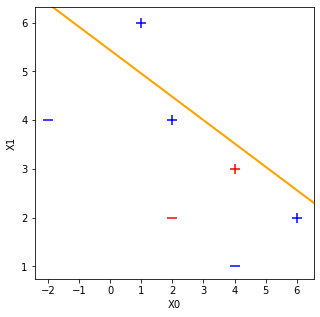

In [10]:
plt.figure(figsize=(5, 5))
plotData(X, y)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='red')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='red')
plt.show()

So, not only is one of the new test points misclassified, one of the training points is also misclassified! 

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

In [11]:
def perceptron_sgd_plot(Xt, Yt, eta=1, epochs=10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                total_error += (np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(total_error * (-1))

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return wt

[3. 4. 9.]


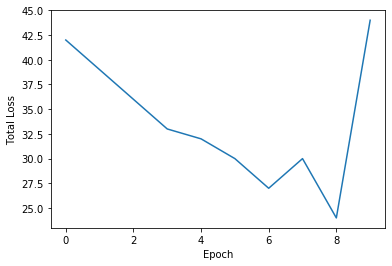

In [12]:
print(perceptron_sgd_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge. 

Try a increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

[ 2.  3. 13.]


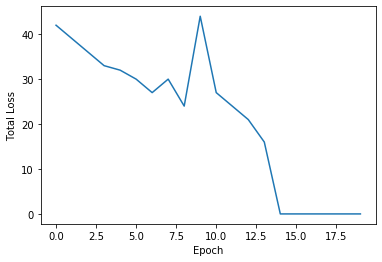

In [13]:
# insett code here
print(perceptron_sgd_plot(X, y, epochs=20))

w: [3. 4. 9.]


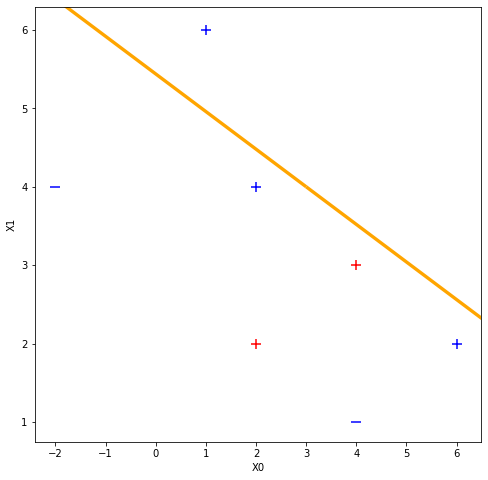

In [14]:
# insett code here
plt.figure(figsize=(8, 8))
plotData(X, y)
plotHyperplane(w)

# Test samples:
print('w:', w)
for x0, x1 in [[2, 2], [4, 3]]:
    m = '_' if np.dot(np.array([x0, x1, -1]), w) < 0 else '+'
    plt.scatter(x0, x1, s=120, marker=m, linewidths=2, color='red')
plt.show()

Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [15]:
# insett code here
def classType(Xi, wt):
    test = np.dot(Xi, wt)
    if (test) > 0:
        return 'Predicts "+" class'
    elif (test) < 0:
        return 'Predicts "-" class'
    else:
        return 'Edge case: Predicts "+" class'

In [16]:
Xi = [3.5, 3.3, -1]
print(classType(Xi, w))

Predicts "+" class


In [17]:
# TEST: make sure the training data get correctly classified:
# insett code here
for i, x in enumerate(X):
    print('%s %4.1f: %s' % (X[i], np.dot(X[i], w),
                            classType(list(X[i]), w)))

[-2  4 -1]  1.0: Predicts "+" class
[ 4  1 -1]  7.0: Predicts "+" class
[ 1  6 -1] 18.0: Predicts "+" class
[ 2  4 -1] 13.0: Predicts "+" class
[ 6  2 -1] 17.0: Predicts "+" class
